In [31]:
from scipy.io import loadmat
import mne
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [43]:
FCz_persubject = {}
FCz_grandaverage = None

l_freq=1.0
h_freq=10.0
re_fs=64
tmin=-0.1
tmax=0.85

session = 1
subjects = np.arange(1,6)

grand_average_epochs = []

In [44]:
for subject in subjects:
    fpath = f"data/sub%02d_ses%d.mat" % (subject, session)

    mat_raw = loadmat(fpath, simplify_cells=1)
    mat_data = mat_raw['run']
    epochs_list = []

    for trial in mat_data:

        # extract trial data and metadata
        eegdata = trial['eeg'].transpose()
        header = trial['header']

        sfreq = header['SampleRate']
        ch_names = list(header['Label'][:-1])
        ch_types = ['eeg'] * len(ch_names)

        info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
        info.set_montage("standard_1020")

        # Create MNE Raw object
        raw = mne.io.RawArray(eegdata, info)

        # Filter the data
        filtdata = raw.copy().filter(l_freq=l_freq, h_freq=h_freq)

        events = header['EVENT']
        events_pos = np.array(events['POS'], dtype=int)
        events_type = np.array(events['TYP'], dtype=int)

        nevents = len(events_pos)
        eventsarr = np.zeros([nevents, 3], dtype=int)
        eventsarr[:,0]= events_pos
        eventsarr[:,2] = events_type

        # decimfactor = sfreq / re_fs
        # epoch = mne.Epochs(raw=filtdata, events = eventsarr, tmin=tmin, tmax=tmax, decim=decimfactor, preload=True)      
        
        epoch = mne.Epochs(raw=filtdata, events = eventsarr, tmin=tmin, tmax=tmax, preload=True, detrend=1)      
        
        epochs_list.append(epoch)
        grand_average_epochs.append(epoch)
    
    # Concatenate all epochs into a single Raw object
    epochs = mne.concatenate_epochs(epochs_list)
    
    correct = epochs[['5','10']].average()
    erroneous = epochs[['6','9']].average()

    errmincorr = mne.combine_evoked([erroneous, correct], weights=[1, -1])
    FCz = errmincorr.get_data(picks=['FCz'])
    FCz_persubject.update({subject:FCz})


epochs = mne.concatenate_epochs(grand_average_epochs)
correct = epochs[['5','10']].average()
erroneous = epochs[['6','9']].average()

errmincorr = mne.combine_evoked([erroneous, correct], weights=[1, -1])

FCz_grandaverage = errmincorr.get_data(picks=['FCz'])

Creating RawArray with float64 data, n_channels=64, n_times=91648
    Range : 0 ... 91647 =      0.000 ...   178.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
69 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_chann

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
75 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 75 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=94720
    Range : 0 ... 94719 =      0.000 ...   184.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
71 matching events foun

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 71 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=95232
    Range : 0 ... 95231 =      0.000 ...   185.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
71 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
67 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 67 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=90112
    Range : 0 ... 90111 =      0.000 ...   175.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
68 matching events foun

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=93184
    Range : 0 ... 93183 =      0.000 ...   181.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
70 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 70 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
74 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 74 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=92672
    Range : 0 ... 92671 =      0.000 ...   180.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
70 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 70 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=102912
    Range : 0 ... 102911 =      0.000 ...   200.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
75 matching events fo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
710 matching events found
Applying baseline correction (mode: mean)
Creating RawArray with float64 data, n_channels=64, n_times=91648
    Range : 0 ... 91647 =      0.000 ...   178.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
69 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 487 o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
72 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   179.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
67 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 67 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=91648
    Range : 0 ... 91647 =      0.000 ...   178.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
69 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=90624
    Range : 0 ... 90623 =      0.000 ...   176.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
67 matching events foun

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
67 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 67 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=93696
    Range : 0 ... 93695 =      0.000 ...   182.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
69 matching events foun

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=91136
    Range : 0 ... 91135 =      0.000 ...   177.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
67 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
70 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 70 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=91648
    Range : 0 ... 91647 =      0.000 ...   178.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
69 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 487 original time points ...
0 bad epochs dropped
Not setting metadata
686 matching events found
Applying baseline correction (mode: mean)
Creating RawArray with float64 data, n_channels=64, n_times=90112
    Range : 0 ... 90111 =      0.000 ...   175.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
69 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   179.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
70 matching events foun

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 70 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=93696
    Range : 0 ... 93695 =      0.000 ...   182.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
70 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
69 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=98816
    Range : 0 ... 98815 =      0.000 ...   192.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
73 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 73 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=91648
    Range : 0 ... 91647 =      0.000 ...   178.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
68 matching events foun

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
71 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 71 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=89088
    Range : 0 ... 89087 =      0.000 ...   173.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
68 matching events foun

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=90624
    Range : 0 ... 90623 =      0.000 ...   176.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
69 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 487 original time points ...
0 bad epochs dropped
Not setting metadata
69

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=64, n_times=88576
    Range : 0 ... 88575 =      0.000 ...   172.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
70 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 70 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_chann

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
70 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 70 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=96256
    Range : 0 ... 96255 =      0.000 ...   187.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
70 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 70 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=91648
    Range : 0 ... 91647 =      0.000 ...   178.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
67 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 67 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=93184
    Range : 0 ... 93183 =      0.000 ...   181.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
71 matching events foun

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
67 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 67 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=89088
    Range : 0 ... 89087 =      0.000 ...   173.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
66 matching events foun

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=91136
    Range : 0 ... 91135 =      0.000 ...   177.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
68 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 68 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
67 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 67 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=90624
    Range : 0 ... 90623 =      0.000 ...   176.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
71 matching events foun

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 71 events and 487 original time points ...
0 bad epochs dropped
Not setting metadata
687 matching events found
Applying baseline correction (mode: mean)
Creating RawArray with float64 data, n_channels=64, n_times=98816
    Range : 0 ... 98815 =      0.000 ...   192.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
74 matching events found
Settin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
72 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=93696
    Range : 0 ... 93695 =      0.000 ...   182.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
71 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 71 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=93696
    Range : 0 ... 93695 =      0.000 ...   182.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
69 matching events foun

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
68 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 68 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=91648
    Range : 0 ... 91647 =      0.000 ...   178.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
68 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 68 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=100352
    Range : 0 ... 100351 =      0.000 ...   195.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
75 matching events fo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
68 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 68 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=94720
    Range : 0 ... 94719 =      0.000 ...   184.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
70 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 70 events and 487 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=64, n_times=91648
    Range : 0 ... 91647 =      0.000 ...   178.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Not setting metadata
68 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 68 events and 487 original time points ...
0 bad epochs dropped
Not setting metadata
703 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
3481 matching events found
Applying baseline correction (mode: mean)


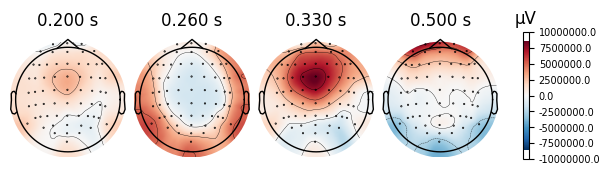

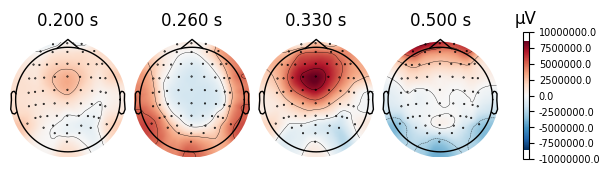

In [45]:
times=[0.2, 0.26, 0.33, 0.5]

errmincorr.plot_topomap(times=times, show=0)

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Tony\AppData\Local\Temp\ipykernel_3656\2039233443.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Amplitude [$\mu$V]")


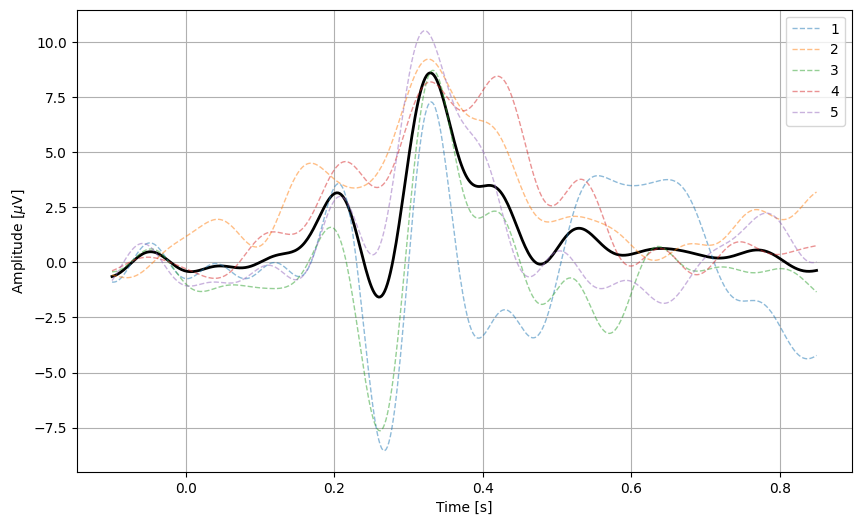

In [48]:
times = errmincorr.times

plt.figure(figsize=(10,6))
plt.plot(times, FCz_grandaverage.flatten(), c='k', lw=2)
for sub, data in FCz_persubject.items():
    plt.plot(times, data.flatten(), ls='--', lw=1, alpha=0.5, label=sub)
plt.grid()
plt.ylabel("Amplitude [$\mu$V]")
plt.xlabel("Time [s]")
plt.legend()
plt.show()